In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SHIB-USD.csv to SHIB-USD.csv
User uploaded file "SHIB-USD.csv" with length 10979 bytes


In [2]:
pip install pandas

In [3]:
pip install numpy

In [4]:
pip install keras

In [5]:
pip install tensorflow

In [6]:
import pandas as pd

In [7]:
#Add SHIB-USD dataset to program
data = pd.read_csv('SHIB-USD.csv')

In [8]:
#the function of head method is to display the first five rows of the SHIB-USD dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-19,0.000016,0.000016,0.000006,0.000009,0.000009,3271067996
1,2021-05-20,0.000009,0.000012,0.000008,0.000010,0.000010,2507945867
2,2021-05-21,0.000010,0.000010,0.000007,0.000008,0.000008,1547207565
3,2021-05-22,0.000008,0.000010,0.000007,0.000008,0.000008,1229821215
4,2021-05-23,0.000008,0.000010,0.000007,0.000008,0.000008,1585032040


In [9]:
#the function of tail method is to display the last five rows of the SHIB-USD dataset
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
160,2021-10-26,0.000042,0.000049,0.000041,0.000048,0.000048,11176750625
161,2021-10-27,0.000048,0.000087,0.000047,0.000080,0.000080,39053846018
162,2021-10-28,0.000079,0.000088,0.000057,0.000068,0.000068,32835212339
163,2021-10-29,0.000069,0.000077,0.000061,0.000075,0.000075,14287074318
164,2021-10-30,0.000074,0.000077,0.000068,0.000070,0.000070,8648860672


In [10]:
#the function of info method is to give information about columns in the SHIB-USD dataset along with theirs properties 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       165 non-null    object 
 1   Open       165 non-null    float64
 2   High       165 non-null    float64
 3   Low        165 non-null    float64
 4   Close      165 non-null    float64
 5   Adj Close  165 non-null    float64
 6   Volume     165 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 9.1+ KB


In [11]:
#this will give information about shiba inu currency's final value of each day
shibacloseData = data[['Date','Close']]
shibacloseData.head()

,Date,Close
0,2021-05-19,0.000009
1,2021-05-20,0.000010
2,2021-05-21,0.000008
3,2021-05-22,0.000008
4,2021-05-23,0.000008


In [12]:
shibacloseData.dtypes

Date      object
Close    float64
dtype: object

In [13]:
shibacloseData = shibacloseData.replace({'\$':''}, regex = True)

In [14]:
#convert Date Column's Type from object to datetime
shibacloseData["Date"] = pd.to_datetime(shibacloseData['Date'])
shibacloseData.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [16]:
shibacloseData.index = shibacloseData['Date']

In [17]:
print(shibacloseData.index)

DatetimeIndex(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
               '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
               '2021-05-27', '2021-05-28',
               ...
               '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24',
               '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
               '2021-10-29', '2021-10-30'],
              dtype='datetime64[ns]', name='Date', length=165, freq=None)


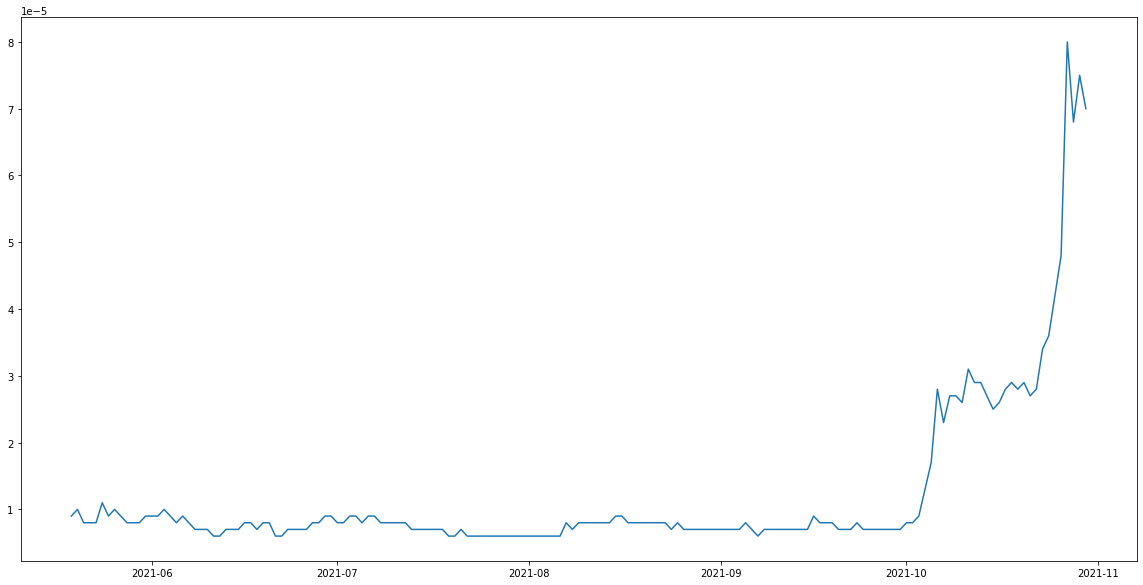

In [18]:
#showing a graph that show the relationships between shiba inu's final price with time
plt.plot(shibacloseData["Close"],label='Close Price history')

In [19]:
shibacloseData = shibacloseData.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(shibacloseData)),columns=['Date','Close'])
for i in range(0,len(data)):
    data['Date'][i]=shibacloseData['Date'][i]
    data['Close'][i]=shibacloseData["Close"][i]
data.head()

,Date,Close
0,2021-05-19 00:00:00,9e-06
1,2021-05-20 00:00:00,1e-05
2,2021-05-21 00:00:00,8e-06
3,2021-05-22 00:00:00,8e-06
4,2021-05-23 00:00:00,8e-06


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    165 non-null    object
 1   Close   165 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


In [21]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler(feature_range=(0,1))

data.index=data.Date
data.drop('Date',axis=1,inplace=True)

final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]

scaler=MinMaxScaler(feature_range=(0,1))

scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [23]:
import numpy as np

In [24]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [25]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(np.array(x_train_data),np.array(y_train_data),epochs=1,batch_size=1,verbose=2)

X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[0],1))

105/105 - 6s - loss: 0.0170 - 6s/epoch - 53ms/step


In [26]:
import tensorflow as tf

In [28]:
#predicted_stock_price=lstm_model.predict(X_test)
#predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

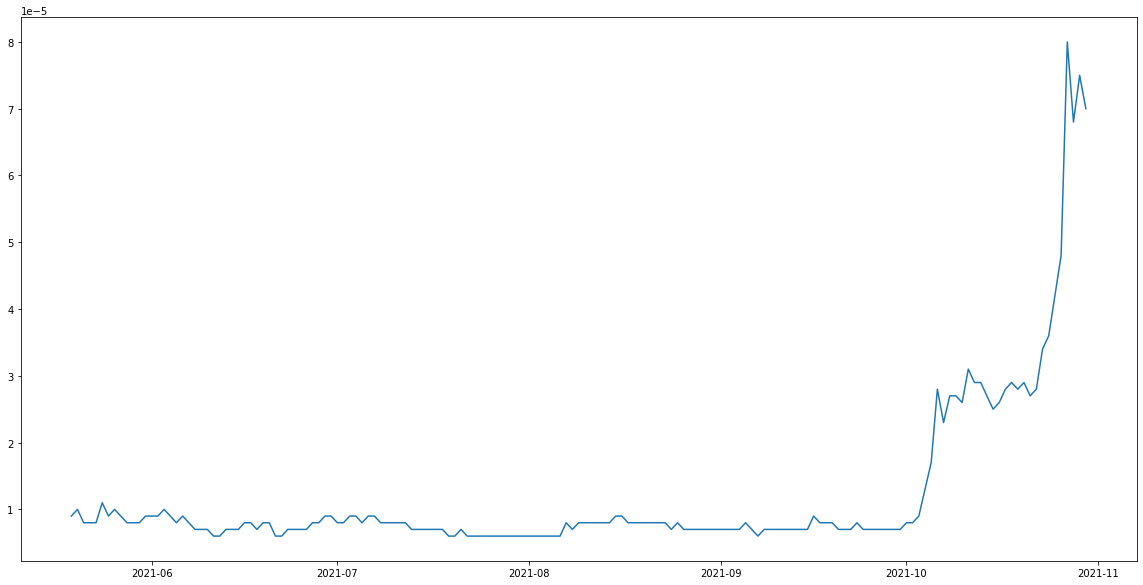

In [30]:
train_data=data[:200]
valid_data=data[200:]
#valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close"])
#plt.plot(valid_data[['Close',"Predictions"]])